# Import Libraries

In [1]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from arch.unitroot import PhillipsPerron
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import pymannkendall as mk
import pandas as pd

# p-value significance level
SIGNIFICANT_LEVEL = 0.05

# Data Loading

In [2]:
africa_df = pd.read_csv("./data/inflation/inflation_in_africa.csv", index_col=0)

In [3]:
africa_df.head()

,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,,,,,,,,,,,,,,,,,,,,,
1980,0.971532,3.481958,13600.737325,10415.857407,5500.209700,1159.187997,4341.023179,1846.959092,1620.237774,1056.797145,...,36.167058,-281.629445,2004.025804,2266.199297,-5.651655,21.493650,26.743294,50.018376,-7.163063,13.037703
1981,-0.823321,2.054507,13744.409177,9891.282407,5863.216552,1239.321330,4623.896142,1973.862981,1662.408118,987.463475,...,37.646317,-490.911667,1975.049508,2446.505408,-6.331100,21.026243,26.955887,-329.303846,-7.639730,18.850817
1982,-0.179432,2.695989,14005.087510,9709.049444,5777.038774,1224.212441,4552.826883,1752.806685,1528.729229,893.654771,...,37.131317,-634.604260,1927.186545,2542.335408,-7.022581,22.110131,28.731072,-324.617735,-8.777878,15.254397
1983,-2.354617,0.458581,14052.476584,9884.352963,5491.232478,1205.945960,4285.286327,1646.330389,1413.759970,883.438104,...,34.617984,-542.346297,1849.040184,2389.676890,-5.822952,21.503899,27.217183,-160.231068,-5.734730,17.481248
1984,-0.871840,1.970618,14500.541769,9642.634259,5335.803034,1149.978923,4185.822994,1572.464463,1408.189229,818.120512,...,34.655762,-500.135371,1824.868147,2323.293001,-5.108322,21.344269,26.342183,-113.255513,-5.128804,17.460508


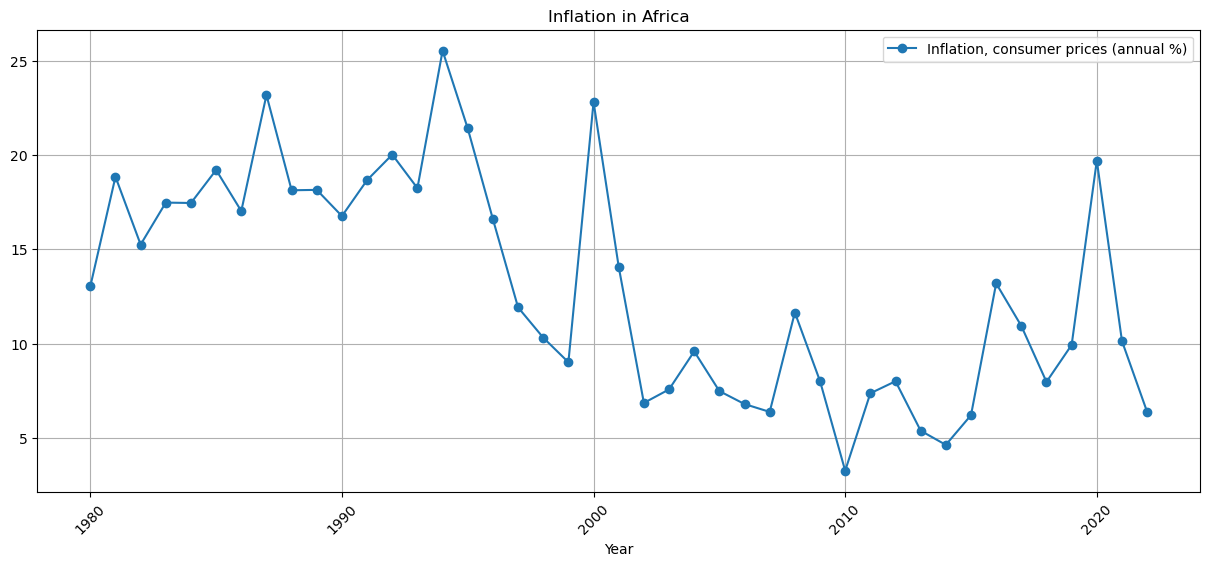

In [4]:
africa_df.plot(
    y="Inflation, consumer prices (annual %)",
    kind="line",
    marker="o",
    figsize=(15, 6),
    title="Inflation in Africa",
)

plt.xticks(rotation=45)
plt.grid()
plt.show()

# EDA

## Decomposition

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposed = seasonal_decompose(
    africa_df["Inflation, consumer prices (annual %)"],
    model="additive",
    period=10,  # 10 years
)

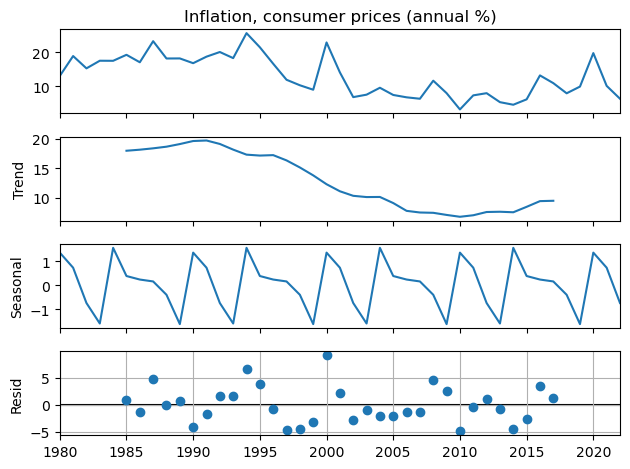

In [6]:
# Plot the decomposed time series
decomposed.plot()

plt.grid()

## Trend Test

In [7]:
mk.original_test(africa_df["Inflation, consumer prices (annual %)"])

Mann_Kendall_Test(trend='decreasing', h=True, p=5.3530495000231326e-05, z=-4.039652317181243, Tau=-0.42857142857142855, s=-387.0, var_s=9130.333333333334, slope=-0.3015878032376542, intercept=18.254080086664946)

## Seasonality Test

The null hypothesis for the Kruskal-Wallis test is that the medians of the groups are equal, which indicate the data has no seasonality.

In [8]:
h_stat, p_value = kruskal(*[africa_df[col] for col in africa_df.columns])

print(f"p-value: {p_value}")

if p_value < SIGNIFICANT_LEVEL:
    print(
        "Reject null hypothesis, There's a significant difference between the groups median"
    )
else:
    print("Fail to reject null hypothesis, The groups are similar")

p-value: 1.1592717695968135e-226
Reject null hypothesis, There's a significant difference between the groups median


## Stationarity Test

### Augmented Dickey-Fuller Test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to check for the presence of a unit root in a time series. The null hypothesis for the ADF test is that a unit root is present in the time series, which means the series is non-stationary

In [9]:
for column in africa_df.columns:
    print(f"Dickey-Fuller test for {column}")
    p_value = adfuller(africa_df[column])[1]

    if p_value < SIGNIFICANT_LEVEL:
        print("Reject null hypothesis, time series is stationary")
    else:
        print("Fail to reject null hypothesis, time series is not stationary")

    print("-" * 70)

Dickey-Fuller test for Real per Capita GDP Growth Rate (annual %)
Reject null hypothesis, time series is stationary
----------------------------------------------------------------------
Dickey-Fuller test for Real GDP growth (annual %)
Reject null hypothesis, time series is stationary
----------------------------------------------------------------------
Dickey-Fuller test for Gross domestic product, (constant prices US$)
Fail to reject null hypothesis, time series is not stationary
----------------------------------------------------------------------
Dickey-Fuller test for Gross domestic product, current prices (current US$)
Fail to reject null hypothesis, time series is not stationary
----------------------------------------------------------------------
Dickey-Fuller test for Final consumption expenditure  (current US$)
Fail to reject null hypothesis, time series is not stationary
----------------------------------------------------------------------
Dickey-Fuller test for General

### Phillips-Perron test

In [10]:
for column in africa_df.columns:
    print(f"Phillips-Perron test for {column}")
    pp = PhillipsPerron(africa_df[column])

    print(pp.summary().as_text())
    print("+" * 70)

Phillips-Perron test for Real per Capita GDP Growth Rate (annual %)
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.851
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Phillips-Perron test for Real GDP growth (annual %)
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.785
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.60 (1%), -2.93 (5%), -2.60 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


### Granger causality test

The test is used to measure the ability to predict the future values of a time series using prior values of another time series.

The null hypothesis for the Granger causality test is that there is no effect of X on Y. If the p-value of the test is less than the significance level, then the null hypothesis is rejected, indicating that X does have a Granger-causal effect on Y.

In [11]:
for column in africa_df.columns:
    print(f"Granger causality test for {column}")
    print(
        grangercausalitytests(
            africa_df[["Inflation, consumer prices (annual %)", column]], maxlag=10
        )
    )
    print("-" * 70)

Granger causality test for Real per Capita GDP Growth Rate (annual %)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7778  , p=0.3832  , df_denom=39, df_num=1
ssr based chi2 test:   chi2=0.8376  , p=0.3601  , df=1
likelihood ratio test: chi2=0.8294  , p=0.3625  , df=1
parameter F test:         F=0.7778  , p=0.3832  , df_denom=39, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7753  , p=0.4681  , df_denom=36, df_num=2
ssr based chi2 test:   chi2=1.7659  , p=0.4136  , df=2
likelihood ratio test: chi2=1.7290  , p=0.4213  , df=2
parameter F test:         F=0.7753  , p=0.4681  , df_denom=36, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3250  , p=0.2828  , df_denom=33, df_num=3
ssr based chi2 test:   chi2=4.8183  , p=0.1856  , df=3
likelihood ratio test: chi2=4.5495  , p=0.2079  , df=3
parameter F test:         F=1.3250  , p=0.2828  , df_denom=33, df_num=3

Granger Causality
number of l

ssr based F test:         F=0.4196  , p=0.8586  , df_denom=24, df_num=6
ssr based chi2 test:   chi2=3.8810  , p=0.6928  , df=6
likelihood ratio test: chi2=3.6906  , p=0.7185  , df=6
parameter F test:         F=0.4196  , p=0.8586  , df_denom=24, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=0.3296  , p=0.9316  , df_denom=21, df_num=7
ssr based chi2 test:   chi2=3.9548  , p=0.7850  , df=7
likelihood ratio test: chi2=3.7523  , p=0.8078  , df=7
parameter F test:         F=0.3296  , p=0.9316  , df_denom=21, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.3857  , p=0.9144  , df_denom=18, df_num=8
ssr based chi2 test:   chi2=5.9991  , p=0.6473  , df=8
likelihood ratio test: chi2=5.5371  , p=0.6989  , df=8
parameter F test:         F=0.3857  , p=0.9144  , df_denom=18, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.5194  , p=0.8387  , df_denom=15, df_num=9
ssr based chi2 test:   chi2=

In [12]:
# differentiate the time series to remove the trend
detrend_df = africa_df.diff().dropna()

In [13]:
# Apply granger causality test on the differenced time series
for column in detrend_df.columns:
    print(f"Granger causality test for {column}")
    print(
        grangercausalitytests(
            detrend_df[["Inflation, consumer prices (annual %)", column]], maxlag=10
        )
    )

Granger causality test for Real per Capita GDP Growth Rate (annual %)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6385  , p=0.4292  , df_denom=38, df_num=1
ssr based chi2 test:   chi2=0.6889  , p=0.4065  , df=1
likelihood ratio test: chi2=0.6832  , p=0.4085  , df=1
parameter F test:         F=0.6385  , p=0.4292  , df_denom=38, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9001  , p=0.1647  , df_denom=35, df_num=2
ssr based chi2 test:   chi2=4.3431  , p=0.1140  , df=2
likelihood ratio test: chi2=4.1231  , p=0.1273  , df=2
parameter F test:         F=1.9001  , p=0.1647  , df_denom=35, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1181  , p=0.3563  , df_denom=32, df_num=3
ssr based chi2 test:   chi2=4.0879  , p=0.2521  , df=3
likelihood ratio test: chi2=3.8876  , p=0.2739  , df=3
parameter F test:         F=1.1181  , p=0.3563  , df_denom=32, df_num=3

Granger Causality
number of l

parameter F test:         F=0.2530  , p=0.9806  , df_denom=11, df_num=10
{1: ({'ssr_ftest': (0.05653445783868106, 0.8133370664411843, 38.0, 1), 'ssr_chi2test': (0.06099770451015588, 0.8049259207447519, 1), 'lrtest': (0.06095237483040705, 0.8049969563552162, 1), 'params_ftest': (0.056534457838674695, 0.8133370664411912, 38.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8c48e3a3b0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8c48dfe8f0>, array([[0., 1., 0.]])]), 2: ({'ssr_ftest': (0.07086219590991948, 0.931723565331709, 35.0, 2), 'ssr_chi2test': (0.16197073350838737, 0.9222071862303121, 2), 'lrtest': (0.16164368460223955, 0.9223580019867571, 2), 'params_ftest': (0.07086219590993463, 0.9317235653316944, 35.0, 2.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8c48eae110>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f8c48eafcd0>, array([[0., 0., 1., 0., 0

## Deseasonalization 

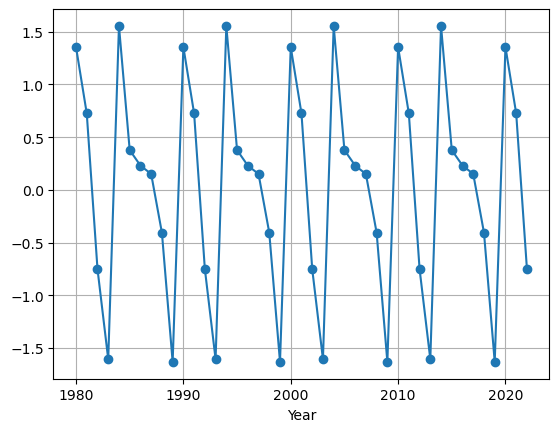

In [14]:
# Plot the seasonal component
decomposed.seasonal.plot(marker="o")

plt.grid()
plt.show()

In [15]:
# deseasonalize the original time series
deseasonalized_df = detrend_df.copy()

for column in africa_df.columns:
    seasonality_component = seasonal_decompose(
        africa_df[column], model="additive", period=10
    ).seasonal
    deseasonalized_df[column] = africa_df[column] - seasonality_component

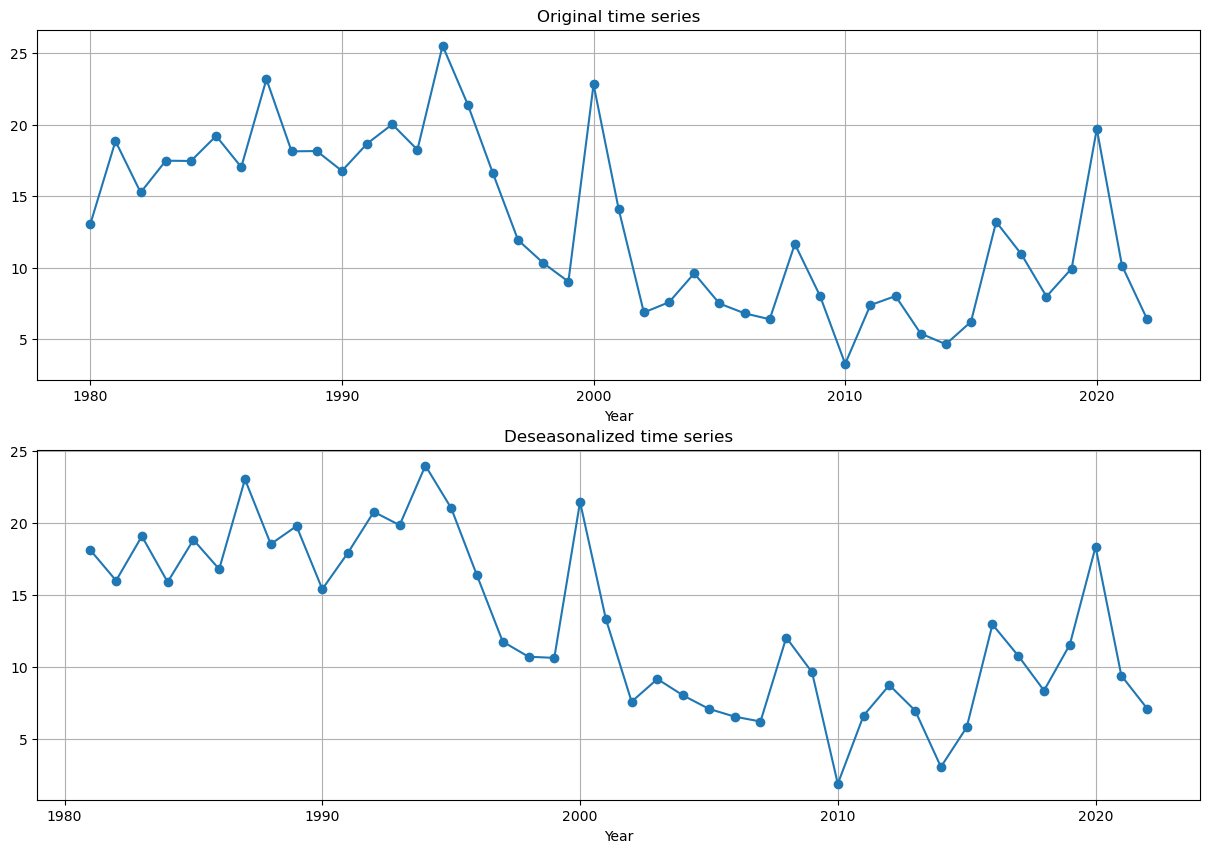

In [16]:
fig, axis = plt.subplots(2, 1, figsize=(15, 10))

africa_df["Inflation, consumer prices (annual %)"].plot(
    marker="o", ax=axis[0], grid=True, title="Original time series"
)
deseasonalized_df["Inflation, consumer prices (annual %)"].plot(
    marker="o", ax=axis[1], grid=True, title="Deseasonalized time series"
)

plt.show()

In [17]:
# Apply Kruskal-Wallis test on the deseasonalized time series
_, p_value = kruskal(*[deseasonalized_df[col] for col in deseasonalized_df.columns])

print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis, There's a significant difference between the groups")
else:
    print("Fail to reject null hypothesis, The groups are similar")

p-value: 1.8019620328709672e-218
Reject null hypothesis, There's a significant difference between the groups
